In [1]:
import numpy as np
import matplotlib.pyplot as plt

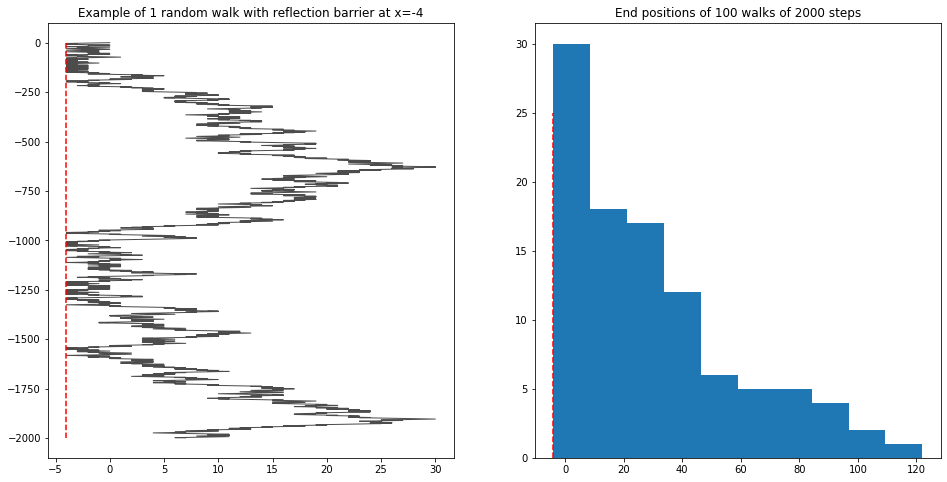

In [25]:
def single_walk1(n=2000, track_trace = False):
    trace = []
    position=0
    for i in range(n):
        if track_trace: trace.append(position)
        if position > -4:
            position+= 1-2*int(np.random.random()<0.5)
        else:
            position = -3
    return position, trace

end_positions = []
for i in range(100):
    if i == 0:
        position, trace_sample = single_walk1(track_trace=True)
        end_positions.append(position)
    else:
        end_positions.append(single_walk1()[0])
        
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Example of 1 random walk with reflection barrier at x=-4')
plt.plot(trace_sample,list(range(0,-len(trace_sample),-1)),color = 'black',linewidth=1, alpha=0.7)
plt.plot([-4,-4],[0,-2000],color = 'red',linestyle = '--')

plt.subplot(1,2,2)
plt.title('End positions of 100 walks of 2000 steps')
plt.hist(end_positions,bins=10)
plt.plot([-4,-4],[0,25],color='red',linestyle = '--')
plt.show()

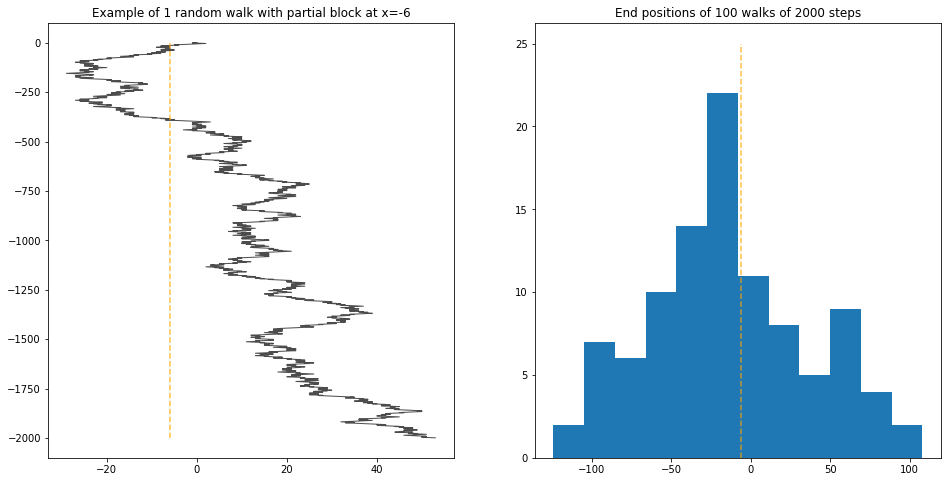

In [35]:
def single_walk2(n=2000, track_trace = False):
    trace = []
    position=0
    for i in range(n):
        if track_trace: trace.append(position)
        if position != -6:
            position+= 1-2*int(np.random.random()<0.5)
        else:
            position+= 1-2*int(np.random.random()<0.75)
    return position, trace

end_positions = []
for i in range(100):
    if i == 0:
        position, trace_sample = single_walk2(track_trace=True)
        end_positions.append(position)
    else:
        end_positions.append(single_walk2()[0])
        
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Example of 1 random walk with partial block at x=-6')
plt.plot(trace_sample,list(range(0,-len(trace_sample),-1)),color = 'black',linewidth=1, alpha=0.7)
plt.plot([-6,-6],[0,-2000],color = 'orange',linestyle = '--',alpha=0.7)

plt.subplot(1,2,2)
plt.title('End positions of 100 walks of 2000 steps')
plt.hist(end_positions,bins=12)
plt.plot([-6,-6],[0,25],color='orange',linestyle = '--',alpha=0.7)
plt.show()

In [58]:
import math
def single_plane_walk(n=1000,variance=1,track_trace=False):
    tracex=[]
    tracey=[]
    position = (0,0)
    for i in range(n):
        if track_trace: 
            tracex.append(position[0])
            tracey.append(position[1])
        direction = np.random.uniform(0,360) 
        theta = math.radians(direction)
        step_size = np.random.normal(0,variance**(1/2))
        position = (step_size*math.cos(theta),step_size*math.sin(theta))
    return position, tracex, tracey

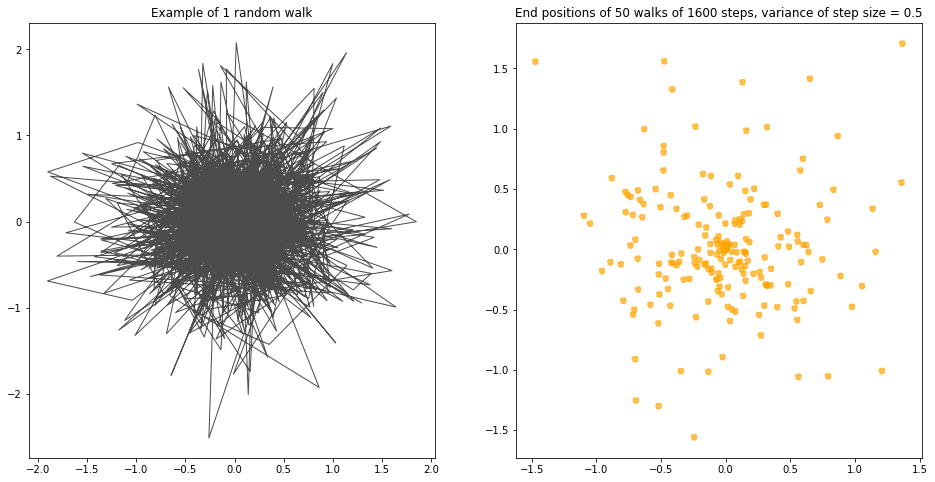

In [55]:
end_positionsx = []
end_positionsy = []
for i in range(200):
    if i == 0:
        position, tracex, tracey = single_plane_walk(n=1600, variance = 0.5, track_trace=True)
        end_positionsx.append(position[0])
        end_positionsy.append(position[1])
    else:
        position, _, _ = single_plane_walk(n=1600,variance=0.5)
        end_positionsx.append(position[0])
        end_positionsy.append(position[1])
        
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Example of 1 random walk')
plt.plot(tracex,tracey,color = 'black',linewidth=1, alpha=0.7)

plt.subplot(1,2,2)
plt.title('End positions of 50 walks of 1600 steps, variance of step size = 0.5')
plt.scatter(end_positionsx,end_positionsy,color='orange',linestyle = '--',alpha=0.7)
plt.show()

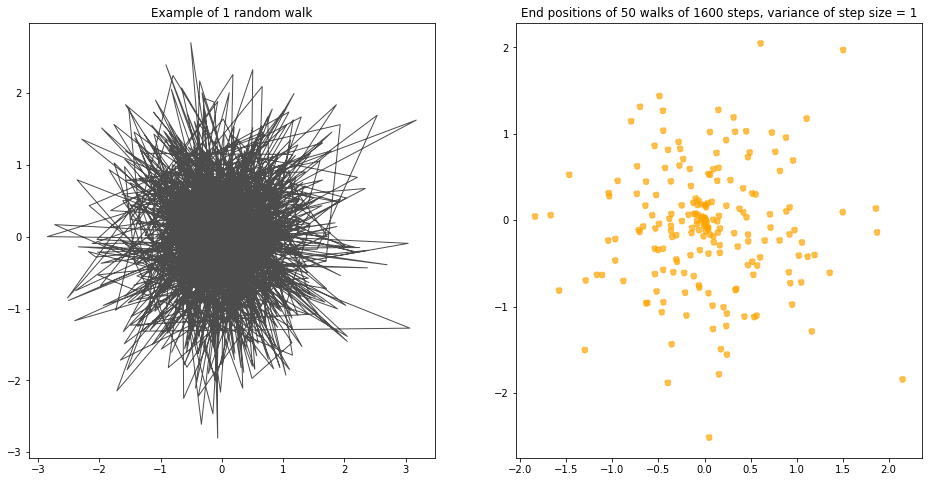

In [56]:
end_positionsx = []
end_positionsy = []
for i in range(200):
    if i == 0:
        position, tracex, tracey = single_plane_walk(n=1600, variance = 1, track_trace=True)
        end_positionsx.append(position[0])
        end_positionsy.append(position[1])
    else:
        position, _, _ = single_plane_walk(n=1600,variance=1)
        end_positionsx.append(position[0])
        end_positionsy.append(position[1])
        
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Example of 1 random walk')
plt.plot(tracex,tracey,color = 'black',linewidth=1, alpha=0.7)

plt.subplot(1,2,2)
plt.title('End positions of 50 walks of 1600 steps, variance of step size = 1')
plt.scatter(end_positionsx,end_positionsy,color='orange',linestyle = '--',alpha=0.7)
plt.show()

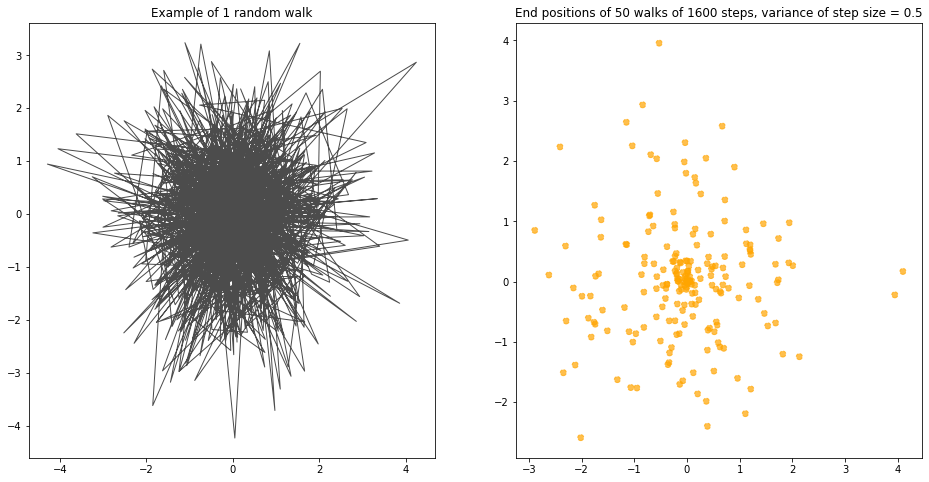

In [57]:
end_positionsx = []
end_positionsy = []
for i in range(200):
    if i == 0:
        position, tracex, tracey = single_plane_walk(n=1600, variance = 2, track_trace=True)
        end_positionsx.append(position[0])
        end_positionsy.append(position[1])
    else:
        position, _, _ = single_plane_walk(n=1600,variance=2)
        end_positionsx.append(position[0])
        end_positionsy.append(position[1])
        
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Example of 1 random walk')
plt.plot(tracex,tracey,color = 'black',linewidth=1, alpha=0.7)

plt.subplot(1,2,2)
plt.title('End positions of 50 walks of 1600 steps, variance of step size = 0.5')
plt.scatter(end_positionsx,end_positionsy,color='orange',linestyle = '--',alpha=0.7)
plt.show()